In [1]:
from math import exp, cos 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
def f(x): 
    return np.arctan(x) + np.exp(x) - x ** 2

def fp(x):
    return 1 / (1+x**2) + np.exp(x) - 2 * x

def fpp(x):
    return (-2*x / (x**2 + 1)**2) - 2 + np.exp(x)

In [3]:
# 1A
def newton1A(f, fp):
    resT = 10 ** -8
    x0 = 0
    xold = 0
    res = f(x0)

    count = 0
    while abs(res) > resT:
        xnew = xold - f(xold)/fp(xold)
        res = f(xnew)
        # print(xnew)
        xold = xnew
        count += 1

    print(f'(1A) The final residual is {f(xold)} after {count} iterations')

In [4]:
def newton1B(f, fp):
    xold = 0
    x = xold - f(xold)/fp(xold)
    xnew = x - f(x)/fp(x)
    count = 0 
    error = 0

    while abs(xnew - x) < abs(x-xold):
        xold = x 
        x = xnew
        xnew = xnew - f(xnew)/fp(xnew)

        count += 1

        error = abs(f(xnew)/fp(xnew))
        # print(abs(xnew - x) < abs(x-xold))

    # print(count)
    # print(error)
    print(f'(1B) The final recorded error was {error} after {count} iterations.')


In [5]:
def rocF(x):
    return f(x)*fpp(x)/(fp(x)**2)

def ROC():
    x = np.linspace(-10,10,500)

    plt.plot(x,rocF(x),'b-',label=r'$g^\prime(x)$')
    plt.plot(x,-1*np.ones_like(x),'k--',label=r'$g(x) = \pm 1$')
    plt.plot(x,np.ones_like(x),'k--')
    plt.xlim([-10,10])
    plt.ylim([-3,3])
    plt.xlabel(r'$x$')
    plt.ylabel(r'$g^\prime(x)$')
    plt.title('Range of convergence for the Newton method')
    plt.legend()
    plt.show()


(1A) The final residual is -8.326672684688674e-17 after 4 iterations

(1B) The final recorded error was 1.1696102175607384e-17 after 5 iterations.


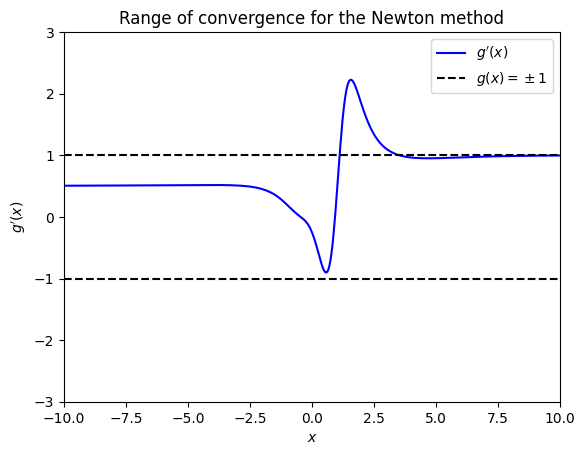

In [6]:
newton1A(f, fp)
print()
newton1B(f, fp)
ROC()

In [7]:
#Question 4 
def pitS(y):
    return (1 + .6084 * (y-1)/2)**(y/(y-1))-1.364
#1.01
#1.04
def bisection(x1, x2, f):
    tol = 1E-4
    count = 0
    error = 1
    xnew = 0
    while error > tol:
        xnew = (x2+x1)/2
        error = abs(f(xnew))

        if f(xnew) * f(x1) > 0:
            x1 = xnew
        else: 
            x2 = xnew 
        
        count += 1
        # print(xnew)
        # print(f(xnew))

    print("***Bisection***")
    print(f'My estimated γ is {xnew} after {count} iterations.')
bisection(1.001, 1.05, pitS)

***Bisection***
My estimated γ is 1.02396875 after 5 iterations.
